## Pre Processing

In [2]:
import pandas as pd
import os
import shutil

# Specify paths
csv_file_path = 'truncated_train.csv'  # Path to your truncated CSV file
audio_folder_path = 'train_model'  # Path to folder containing audio samples
output_csv_path = 'test.csv'  # Path to save cleaned CSV file
output_audio_folder = 'test_folder'  # Path to save processed audio files

# Step 1: Read the CSV file and filter rows based on the desired text column
df = pd.read_csv(csv_file_path)

# Check for missing text values
missing_text = df['age'].isnull()
df_cleaned = df[~missing_text]  # Keep rows where 'category' is not null

# Extract filenames without directory path
df_cleaned.loc[:, 'filename'] = df_cleaned['filename'].apply(lambda x: os.path.basename(x))


# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv(output_csv_path, index=False)

# Step 2: Remove corresponding audio files for rows with missing text
# Get list of valid filenames from cleaned DataFrame
valid_filenames = df_cleaned['filename'].tolist()

# Create output audio folder if it doesn't exist
os.makedirs(output_audio_folder, exist_ok=True)

#print("Copying audio files...")

# Lists to store copied and skipped filenames
copied_files = []
skipped_files = []
print("\033[1;4;35mCopying audio files...\033[0m")

#print("Copying audio files...")

# Print table header
print("\n")
print("\033[1;4;32mFile Status      | Filename\033[0m")
print("\033[1;4;33m-----------------|-----------------------\033[0m")


# Iterate through audio files in the original folder and move valid ones to the output folder
for filename in os.listdir(audio_folder_path):
    status = ""
    if filename in valid_filenames:
        source_path = os.path.join(audio_folder_path, filename)
        destination_path = os.path.join(output_audio_folder, filename)
        try:
            shutil.copyfile(source_path, destination_path)
            status_color = "\033[34m"  # Dark blue color for "Copying"
            status = "Copying"
        except FileNotFoundError:
            status_color = "\033[31m"  # Red color for "Error"
            status = "Error"
    else:
        status_color = "\033[31m"  # Red color for "Skipping"
        status = "Skipping"
            


    # Print filename and status
    print(f"{status_color}{status.ljust(17)}\033[0m\033[33m|\033[0m {filename}")

   
print("\033[1;4;33m-----------------|-----------------------\033[0m")
print("\033[1;4;34mProcessing Completed....\033[0m")

Copying audio files...


File Status      | Filename
-----------------|-----------------------
Skipping         | .ipynb_checkpoints
Skipping         | sample-000001.mp3
Skipping         | sample-000002.mp3
Skipping         | sample-000003.mp3
Skipping         | sample-000004.mp3
Copying          | sample-000005.mp3
Skipping         | sample-000006.mp3
Skipping         | sample-000007.mp3
Copying          | sample-000008.mp3
Skipping         | sample-000009.mp3
Skipping         | sample-000010.mp3
Skipping         | sample-000011.mp3
Skipping         | sample-000012.mp3
Copying          | sample-000013.mp3
Copying          | sample-000014.mp3
Skipping         | sample-000015.mp3
Skipping         | sample-000016.mp3
Skipping         | sample-000017.mp3
Skipping         | sample-000018.mp3
Copying          | sample-000019.mp3
Copying          | sample-000020.mp3
Skipping         | sample-000021.mp3
Skipping         | sample-000022.mp3
Copying          | sample-000023.mp3
Skipping        

## Features Extraction

,filename,age,pitch,formants,intensity,duration,spectral_features
0,sample-000005.mp3,20,250.126510,0.020709,0.006928,5.832018,"[-576.35815, 86.36964, 11.836998, 49.367302, -..."
1,sample-000008.mp3,70,494.599705,0.026985,0.015059,1.728027,"[-414.32397, 97.80697, -25.68917, 8.567275, 9...."
2,sample-000013.mp3,30,385.974958,0.061031,0.038097,4.224036,"[-361.25284, 105.207245, -68.151054, 50.190323..."
3,sample-000014.mp3,60,201.387009,0.007565,0.032311,5.376009,"[-419.39084, 103.662735, 15.23975, 36.23349, 1..."
4,sample-000019.mp3,50,218.856635,0.011041,0.045045,3.720000,"[-281.06738, 123.94077, 24.031395, 10.403619, ..."
...,...,...,...,...,...,...,...
2469,sample-014940.mp3,50,706.717208,0.049003,0.025958,2.544036,"[-441.5392, 26.364674, -21.952198, 50.930344, ..."
2470,sample-014965.mp3,50,331.383231,0.019212,0.023566,3.264036,"[-395.9254, 105.08565, -11.94581, 14.841935, -..."
2471,sample-014968.mp3,20,273.672692,0.008406,0.073356,6.576009,"[-347.44565, 104.83835, 19.13228, 19.38177, -4..."
2472,sample-014995.mp3,30,249.904242,0.028493,0.073049,3.024036,"[-313.76318, 116.72538, -26.44377, 41.692253, ..."


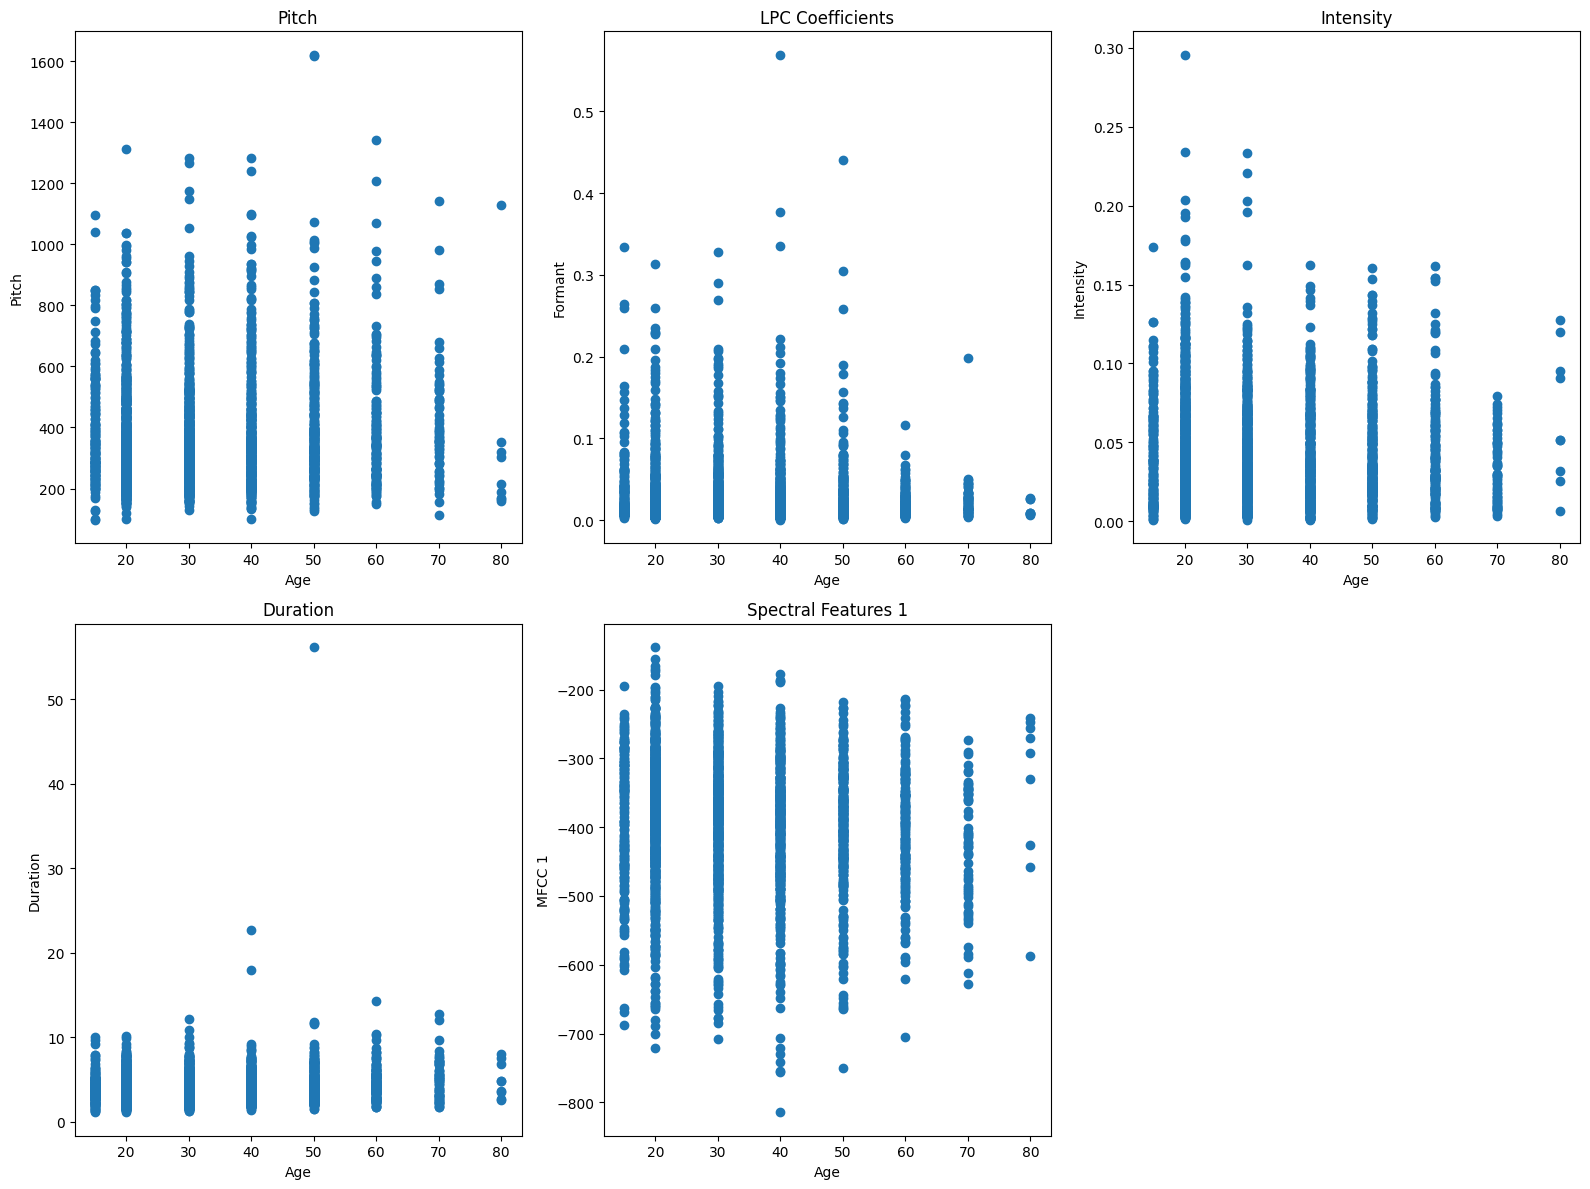

In [62]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def extract_features2(audio_file):
    y, sr = librosa.load(audio_file)
    
    # Extract relevant acoustic features
    pitch = np.mean(librosa.yin(y, fmin=50, fmax=2000))
    lpc_coefficients = np.mean(librosa.lpc(y, order=2))
    intensity = np.mean(librosa.feature.rms(y=y))
    duration = librosa.get_duration(y=y, sr=sr)
    spectral_features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
    
    return pitch, lpc_coefficients, intensity, duration, spectral_features

# Directory containing audio files
audio_dir = "train_folder"

# Read age information from a CSV file
age_df = pd.read_csv("train.csv")  # Assuming the CSV file contains 'filename' and 'age' columns

# Mapping age categories to numerical representations
age_mapping = {
    "teens": 15,
    "twenties": 20,
    "thirties": 30,
    "fourties": 40,
    "fifties": 50,
    "sixties": 60,
    "seventies": 70,
    "eighties":80
    # Add more mappings as needed
}

# List to store extracted features
all_features = []

# Iterate over audio files in the directory
for filename in os.listdir(audio_dir):
    if filename.endswith(".mp3"):
        audio_file = os.path.join(audio_dir, filename)
        try:
            # Extract features from the audio file
            pitch, formants, intensity, duration, spectral_features = extract_features2(audio_file)
            
            # Find age of the current file
            age_str = age_df.loc[age_df['filename'] == filename, 'age'].iloc[0]
            
            # Convert age string to numerical representation
            if age_str.isdigit():
                age = int(age_str)
            else:
                age = age_mapping.get(age_str.lower())  # Use mapping if available
                if age is None:
                    print(f"Unknown age value for {filename}: {age_str}. Skipping this file.")
                    continue
            
            # Append features to the list along with age
            all_features.append({
                "filename": filename,
                "age": age,
                "pitch": pitch,
                "formants": formants,
                "intensity": intensity,
                "duration": duration,
                "spectral_features": spectral_features
            })
        except Exception as e:
            print(f"Error processing {filename}: {e}")
    else:
        print(f"Skipping non-MP3 file: {filename}")

# Convert list of dictionaries to DataFrame
df_features = pd.DataFrame(all_features)
display(df_features)
# Visualize extracted features using scatter plots against age
plt.figure(figsize=(16, 12))

# Plot pitch against age
plt.subplot(2, 3, 1)
plt.scatter(df_features['age'], df_features['pitch'])
plt.title('Pitch')
plt.xlabel('Age')
plt.ylabel('Pitch')

# Plot LPC coefficients against age
plt.subplot(2, 3, 2)
plt.scatter(df_features['age'], df_features['formants'])
plt.title('LPC Coefficients')
plt.xlabel('Age')
plt.ylabel('Formant')

# Plot intensity against age
plt.subplot(2, 3, 3)
plt.scatter(df_features['age'], df_features['intensity'])
plt.title('Intensity')
plt.xlabel('Age')
plt.ylabel('Intensity')

# Plot duration against age
plt.subplot(2, 3, 4)
plt.scatter(df_features['age'], df_features['duration'])
plt.title('Duration')
plt.xlabel('Age')
plt.ylabel('Duration')

# Plot spectral features against age (limiting to 6 coefficients for demonstration)
for i in range(1):
    plt.subplot(2, 3, i+5)
    plt.scatter(df_features['age'], df_features['spectral_features'].apply(lambda x: x[i]))
    plt.title(f'Spectral Features {i+1}')
    plt.xlabel('Age')
    plt.ylabel(f'MFCC {i+1}')

plt.tight_layout()
plt.show()



## Model Training and Testing

In [63]:
import os
import librosa
import numpy as np
import pandas as pd

# Function to extract features from an audio file
def extract_features2(audio_file):
    y, sr = librosa.load(audio_file)
    
    # Extract relevant acoustic features
    pitch = np.mean(librosa.yin(y, fmin=50, fmax=2000))
    lpc_coefficients = np.mean(librosa.lpc(y, order=2))
    intensity = np.mean(librosa.feature.rms(y=y))
    duration = librosa.get_duration(y=y, sr=sr)
    spectral_features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
    
    return pitch, lpc_coefficients, intensity, duration, spectral_features

# Function to prepare training data
def prepare_training_data(train_audio_dir, df_labels):
    train_data = []

    for filename in os.listdir(train_audio_dir):
        if filename.endswith(".mp3"):
            audio_file = os.path.join(train_audio_dir, filename)
            try:
                pitch, formants, intensity, duration, spectral_features = extract_features2(audio_file)
                age_label_str = df_labels[df_labels['filename'] == filename]['age'].values[0]
                age_label = age_mapping.get(age_label_str.lower(), None)  # Map string-based age label to numerical value
                if age_label is not None:
                    train_data.append({
                        "filename": filename,
                        "pitch": pitch,
                        "formants": formants,
                        "intensity": intensity,
                        "duration": duration,
                        "spectral_features": spectral_features,  # Use the extracted spectral features directly
                        "age": age_label
                    })
                else:
                    print(f"Skipping {filename}: Invalid age label '{age_label_str}'")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

    return train_data

# Directory containing audio files (train and test)
train_audio_dir = "train_folder"

# CSV file containing true ages for training samples
csv_file = "train.csv"

# Read age information from a CSV file
age_df = pd.read_csv(csv_file)  # Assuming the CSV file contains 'filename' and 'age' columns

# Mapping age categories to numerical representations

age_mapping = {
        'twenties': (20, 29),
        'thirties': (30, 39),
        'fourties': (40, 49),
        'fifties': (50, 59),
        'sixties': (60, 69),
        'seventies': (70, 79),
        'eighties': (80, 89),
        'teens': (10, 19)  # Adjusted for realistic range
        # Add more mappings as needed
    }

# Prepare training data
train_data = prepare_training_data(train_audio_dir, age_df)



In [73]:
from tabulate import tabulate
# Function to train a linear regression model
def train_linear_regression(train_data):
    # Extract features and labels from train_data
    X_train = np.array([[sample['pitch'], sample['formants'], sample['intensity'], sample['duration'], *sample['spectral_features']] for sample in train_data])
    y_train = np.array([sample['age'] for sample in train_data])

    # Add a column of ones for the intercept term
    X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))

    # Calculate coefficients using closed-form solution
    coeffs = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

    return coeffs


# Function to make predictions using the trained linear regression model
def predict_linear_regression(test_data, coeffs):
    # Extract features from test_data
    X_test = np.array([[sample['pitch'], sample['formants'], sample['intensity'], sample['duration'], *sample['spectral_features']] for sample in test_data])

    # Add a column of ones for the intercept term
    X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

    # Make predictions
    y_pred = X_test @ coeffs

    return y_pred




# Example usage:
# Train the linear regression model
coeffs = train_linear_regression(train_data)

# Make predictions on test data
test_audio_dir = "test_folder"
test_data = prepare_training_data(test_audio_dir, age_df)  # Assuming the test data is prepared in a similar format
predictions = predict_linear_regression(test_data, coeffs)

# Function to load true ages from a CSV file
def load_true_ages(csv_file):
    df_labels = pd.read_csv(csv_file)
    true_ages_dict = df_labels.set_index('filename')['age'].to_dict()
    return true_ages_dict

# Load true ages from CSV file
true_ages_dict = load_true_ages("test.csv")

# Display predictions



# Initialize an empty list to store data for the table
data = []

# Iterate through the test_data
for i, sample in enumerate(test_data):
    filename = sample['filename']
    predicted_age = predictions[i]
    # Calculate the average of the predicted ages
    predicted_age_avg = sum(predicted_age) / len(predicted_age)
    true_age = true_ages_dict.get(filename, "Unknown")  # Get true age from dictionary
    
    # Format the data with color codes
    formatted_filename = f"\033[35m{filename}\033[0m"  # Magenta color for filename
    formatted_predicted_age = f"\033[32m{predicted_age_avg:.2f}\033[0m"  # Green color for predicted age
    formatted_true_age = f"\033[34m{true_age}\033[0m"  # Blue color for true age
    
    # Append the formatted data for this sample as a list of values to the main data list
    data.append([formatted_filename, formatted_predicted_age, formatted_true_age])

# Define headers for the table
headers = [f"\033[33;4m{header}\033[0m" for header in ["Filename", "Predicted Age", "True Age"]]  # Yellow color with underline

# Print the table using tabulate
table = tabulate(data, headers=headers, tablefmt="fancy_grid")  # You can use different tablefmt options
print(table)





╒═══════════════════╤═════════════════╤════════════╕
│ Filename          │   Predicted Age │ True Age   │
╞═══════════════════╪═════════════════╪════════════╡
│ sample-000005.mp3 │           38.13 │ twenties   │
├───────────────────┼─────────────────┼────────────┤
│ sample-000008.mp3 │           34.49 │ seventies  │
├───────────────────┼─────────────────┼────────────┤
│ sample-000013.mp3 │           30.32 │ thirties   │
├───────────────────┼─────────────────┼────────────┤
│ sample-000014.mp3 │           36.17 │ sixties    │
├───────────────────┼─────────────────┼────────────┤
│ sample-000019.mp3 │           36.23 │ fifties    │
├───────────────────┼─────────────────┼────────────┤
│ sample-000020.mp3 │           31.34 │ thirties   │
├───────────────────┼─────────────────┼────────────┤
│ sample-000023.mp3 │           38.66 │ thirties   │
├───────────────────┼─────────────────┼────────────┤
│ sample-000026.mp3 │           36.26 │ twenties   │
├───────────────────┼─────────────────┼───────

## Accuracy and Error

In [78]:
import numpy as np
import pandas as pd


import pandas as pd

age_mapping = {
    'twenties': (20, 29),
    'thirties': (30, 39),
    'fourties': (40, 49),
    'fifties': (50, 59),
    'sixties': (60, 69),
    'seventies': (70, 79),
    'eighties': (80, 89),
    'teens': (10, 19)  # Adjusted for realistic range
    # Add more mappings as needed
}

def load_true_ages(csv_file):
    df_labels = pd.read_csv(csv_file)
    true_ages = []
    for _, row in df_labels.iterrows():
        age_range = row['age']
        age_range = age_range.lower()  # Convert to lowercase for case insensitivity
        if age_range in age_mapping:
            min_age, max_age = age_mapping[age_range]
            true_age = (min_age + max_age) / 2  # Calculate average age in the range
            true_ages.append(true_age)
        else:
            true_ages.append(None)  # Handle unknown age ranges

    df_labels['age'] = true_ages
    true_ages_dict = df_labels.set_index('filename')['age'].to_dict()
    return true_ages_dict




def evaluate_model(predictions, true_ages_dict):
    true_ages = []
    predicted_ages = []
    for i, sample in enumerate(test_data):
        filename = sample['filename']
        true_age = true_ages_dict.get(filename, None)
        if true_age is not None:
            predicted_age = predictions[i]
            if isinstance(predicted_age, (list, np.ndarray)):
                predicted_age_avg = np.mean(predicted_age)
                true_ages.append(true_age)
                predicted_ages.append(predicted_age_avg)
            else:
                true_ages.append(true_age)
                predicted_ages.append(predicted_age)
        else:
            print(f"No true age found for sample {filename}")

    #print("Number of true ages:", len(true_ages))
    #print("Number of predicted ages:", len(predicted_ages))

    true_ages = np.array(true_ages)
    predicted_ages = np.array(predicted_ages)

    #print("True ages:", true_ages)
    #print("Predicted ages:", predicted_ages)

    if len(true_ages) == 0 or len(predicted_ages) == 0:
        print("No valid samples for evaluation")
        return np.nan, np.nan, np.nan, np.nan

    # Calculate metrics
    mae = np.mean(np.abs(true_ages - predicted_ages))  # mean absolute error
    r2 = 1 - (np.sum((true_ages - predicted_ages) ** 2) / np.sum((true_ages - np.mean(true_ages)) ** 2))  #accuracy

    return mae, r2





# Load true ages from CSV file
true_ages_dict = load_true_ages("test.csv")

# Evaluate model
mae,r2 = evaluate_model(predictions, true_ages_dict)

# Print Mean Absolute Error (MAE) with header in yellow color and underline
print(f"\033[33;4mMean Absolute Error (MAE):\033[0m \033[95m{mae}\033[0m")
print("\n")
# Print R-squared (R2) Score with header in yellow color and underline
print(f"\033[33;4mR-squared (R2) Score:\033[0m \033[94m{r2}\033[0m")


Mean Absolute Error (MAE): 11.572538794724348


R-squared (R2) Score: 0.0816573660292137


## THE END..